<a href="https://colab.research.google.com/github/rokmr/Image-Processing/blob/main/Image__Processing_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import skimage.io
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!git clone https://github.com/rokmr/Image-Processing.git
!cp -r /content/Image-Processing/Images/01 /content/images

Cloning into 'Image-Processing'...
remote: Enumerating objects: 59, done.
remote: Total 59 (delta 0), reused 0 (delta 0), pack-reused 59
Unpacking objects: 100% (59/59), 5.24 MiB | 11.80 MiB/s, done.


#Histogram Computation

Compute the histogram of the following images GulmoharMarg.png,
GulmoharMargDark.png, and GulmoharMargBright.png, by finding the frequency of pixels for
each intensity level {0, 1, . . . , 255}. For each image, show the histogram by plotting frequencies
w.r.t. intensity levels. Comment on what you observe. Also verify one of the plots with MATLAB
/ Python in-built functions for computing histogram.


In [3]:
GulmoharMarg = skimage.io.imread("/content/images/GulmoharMarg.png")
GulmoharMargDark = skimage.io.imread("/content/images/GulmoharMargDark.png")
GulmoharMargBright = skimage.io.imread("/content/images/GulmoharMargBright.png")

In [4]:
def histogram(image:np.ndarray) -> list:
  hist = [0] *256                #initializing the count for all te intensities
  m , n =image.shape
  for i in range(m):
    for j in range(n):
      hist[image[i][j]] += 1      #increasing the count for intensity
  return hist

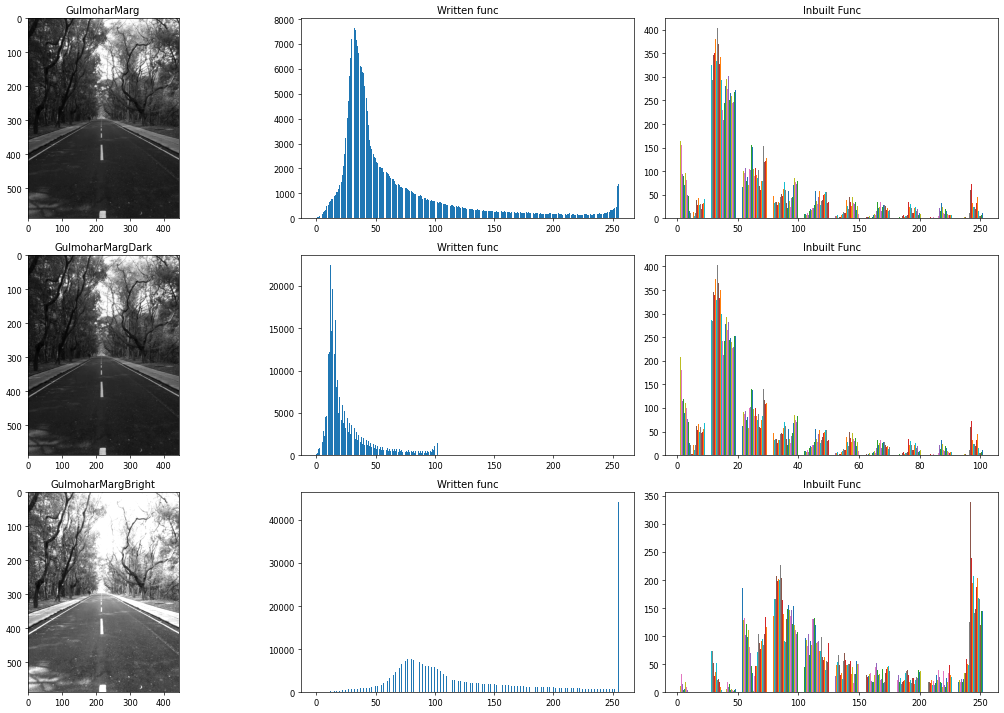

In [5]:
X = list(range(0, 256))
plt.figure(figsize=(18, 12), dpi=60)
plt.subplot(331)
plt.imshow(GulmoharMarg,cmap='gray')
plt.title("GulmoharMarg")
plt.subplot(332)
plt.bar(X, histogram(GulmoharMarg))
plt.title("Written func")
plt.subplot(333)
plt.hist(GulmoharMarg)
plt.title("Inbuilt Func")

plt.subplot(334)
plt.imshow(GulmoharMargDark,cmap='gray')
plt.title("GulmoharMargDark")
plt.subplot(335)
plt.bar(X, histogram(GulmoharMargDark))
plt.title("Written func")
plt.subplot(336)
plt.hist(GulmoharMargDark)
plt.title("Inbuilt Func")

plt.subplot(337)
plt.imshow(GulmoharMargBright,cmap='gray')
plt.title("GulmoharMargBright")
plt.subplot(338)
plt.bar(X, histogram(GulmoharMargBright))
plt.title("Written func")
plt.subplot(339)
plt.hist(GulmoharMargBright)
plt.title("Inbuilt Func")
plt.tight_layout()
plt.show()

******
***Dark Image has higher densities at starting of histogram whereas brighter has nearer the end***
******

# Otsu’s Binarization: 

**In the class, we showed that var_b + var_w = var_T for T being Threshold.**

**Binarize the image coins.png by sweeping over all integer values of t and plot
var_b , var_w & var_T w.r.t. t.**

**Verify that the minimum of var_w and maximum of var_b is located
at the same threshold.**

**SOLUTION**

***PMF of intensity***

p(k) = H(k) / MN     where, H(k) = frequency of occurence of intensity k in M X N  sized image

***Class Probability***

ω0 = ∑ p(k) :k= 0 to T

ω1 = ∑ p(k) :k= T+1 to 255

***Class Mean***

m0 = ∑ k*p(k) / w0 , where k = intensity value (0 to T)

m1 = ∑ k*p(k) / w1, k: T+1 to 255


OVERALL IMAGE MEAN: 

mT = m0 * ω0 + m1 * ω1

***Class Variance***

var0 = ∑ (k-m0) * p(k) / ω0

var1 = ∑ (k-m1) * p(k) / ω1

OVERALL IMAGE MEAN: 

var_T = ∑(k-mT)^2 * p(k) ∀k

***Within (intra) Class Variance***

var_w = ω0 * var0 + ω1 * var1

***Between (inter) Class Variance***

var_b = ω0 (m0-mT)^2 + ω1 (m1-mT)^2 
******
**RELATION**

var_b + var_w = var_T

var_b = ω0 * ω1 * (m0-m1)^2

In [6]:
image = skimage.io.imread("/content/images/coins.png")
M, N = image.shape

hist_list = np.array(histogram(image))
# Forming p(k): PMF
p = hist_list / (M*N)

In [7]:
Within_Class_Var = []
Between_Class_Var = []
Overall_Var = []

t = np.arange(0,256)
for T in t:
  # Class Probability
  w0 = sum(p[0:T+1])       # 0 to T
  w1 = sum(p[T+1:256])     # T+1 to 255

  # Class Mean
  if w0 != 0: m0 = sum(np.arange(0, T+1) * p[0:T+1])  / w0      # 0 to T
  else: m0 = 0
  if w1 != 0:  m1 = sum(np.arange(T+1, 256) * p[T+1:256])  / w1 # T+1 to 255
  else: m1 = 0 

  # Overall Mean
  mT = w0 * m0 + w1 * m1

  # Class Variance
  if w0 != 0: var0 = sum( (np.arange(0, T+1) - m0)**2 * p[0:T+1]/w0) 
  else: var0 = 0
  if w1 != 0: var1 = sum( (np.arange(T+1, 256) - m1)**2 * p[T+1:256]/w1)
  else: var1 = 0

  #Overall Variance
  var_T = sum( (np.arange(0,256) - mT)**2 * p)
  Overall_Var.append(var_T)

  # Within Class Variance
  var_w = w0 * var0 + w1 * var1
  Within_Class_Var.append(var_w)

  # Between Class Variance
  var_b = w0 * w1 * (m0 - m1)**2
  Between_Class_Var.append(var_b)
  

In [8]:
min_var_w_t = np.argmin(Within_Class_Var)
max_var_b_t = np.argmax(Between_Class_Var) 
print(f"Minimum of var_w loacted @ threshold, t= {min_var_w_t}")
print(f"Maximum of var_b loacted @ threshold, t= {max_var_b_t}")

Minimum of var_w loacted @ threshold, t= 125
Maximum of var_b loacted @ threshold, t= 125


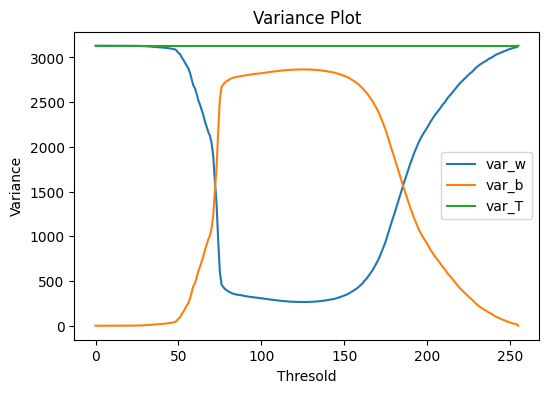

In [9]:
plt.figure(figsize=(6,4))
plt.title("Variance Plot")
plt.plot(t,Within_Class_Var, label = "var_w")
plt.plot(t,Between_Class_Var, label = "var_b")
plt.plot(t, Overall_Var, label = "var_T")
plt.xlabel("Thresold")
plt.ylabel("Variance")
plt.legend()
plt.show()

******
***From above Discussion for this given image threshold t = 125 is best for binarization***

***This thresold can be achieved with the help of beteen class variance only. It is also cheaper in computation than within class variance.***

***Plot of total class variance will be a straight line parallel to X axis 
showing that total variance doesn’t depends upon the threshold value.***
******

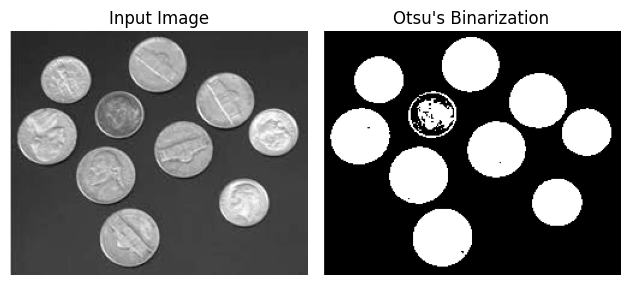

In [10]:
out_image = image > max_var_b_t
out_image = out_image * 255
plt.figure()
plt.subplot(121)
plt.title("Input Image")
plt.imshow(image, cmap='gray')
plt.axis(False)
plt.subplot(122)
plt.title("Otsu's Binarization")
plt.imshow(out_image, cmap='gray')
plt.axis(False)
plt.tight_layout()
plt.show()

#Foreground Extraction

***For the image IIScText.png, separate the foreground text from the
background using otsu binarization. Display the text in IIScText.png on the background image
IIScMainBuilding.png***

In [11]:
IIScText = skimage.io.imread("/content/images/IIScText.png")
IIScText_GRAY = (skimage.color.rgb2gray(IIScText)*255).astype(np.uint8)


***Applying Otsu in grayscale image for text extraction***

In [12]:
def ostu_binarization(image:np.array) -> int:
  M, N = image.shape

  hist_list = np.array(histogram(image))
  # Forming p(k): PMF
  p = hist_list / (M*N)

  Between_Class_Var = []
  t = np.arange(0,256)
  for T in t:
    # Class Probability
    w0 = sum(p[0:T+1])       # 0 to T
    w1 = sum(p[T+1:256])     # T+1 to 255

    # Class Mean
    if w0 != 0: m0 = sum(np.arange(0, T+1) * p[0:T+1])  / w0      # 0 to T
    else: m0 = 0
    if w1 != 0:  m1 = sum(np.arange(T+1, 256) * p[T+1:256])  / w1 # T+1 to 255
    else: m1 = 0 

    # Class Variance
    if w0 != 0: var0 = sum( (np.arange(0, T+1) - m0)**2 * p[0:T+1]/w0) 
    else: var0 = 0
    if w1 != 0: var1 = sum( (np.arange(T+1, 256) - m1)**2 * p[T+1:256]/w1)
    else: var1 = 0

    # Between Class Variance
    var_b = w0 * w1 * (m0 - m1)**2
    Between_Class_Var.append(var_b)

  threshold = np.argmax(Between_Class_Var)
  return threshold
threshold = ostu_binarization(IIScText_GRAY)
threshold

110


******
***THRESHOLD : 110***
******

In [13]:
# Generating Binary Image
binaryImage = IIScText_GRAY > threshold
binaryImage = binaryImage * 1                   #True False converted to 0 and 1

# Getting Index where the text is present
textIndex = np.where(binaryImage == 1)

In [14]:
Background_image = skimage.io.imread("/content/images/IIScMainBuilding.png")
# Adding Text to Background image
Background_image[textIndex] = IIScText[textIndex]

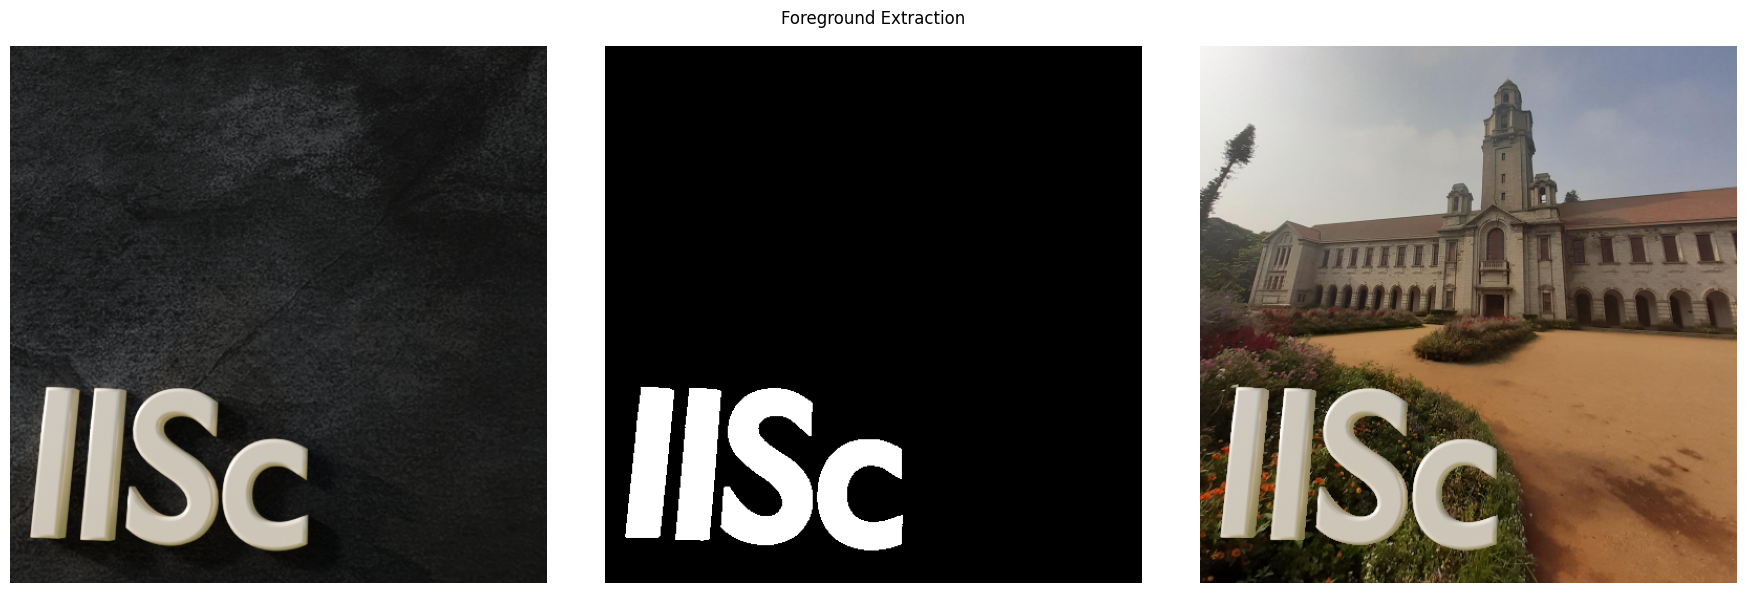

In [15]:
plt.figure(figsize=(18,6))
plt.suptitle("Foreground Extraction",)
plt.subplot(131)
plt.imshow(IIScText)
plt.axis(False)
plt.subplot(132)
plt.imshow(binaryImage,cmap='gray')
plt.axis(False)
plt.subplot(133)
plt.imshow(Background_image)
plt.axis(False)
plt.tight_layout()
plt.show()

#Connected Components

***Binarize the image Shapes.png and count the total number of shapes
using connected component analysis. Also compute the number of occurrences of the circles.***

In [16]:
Shapes = skimage.io.imread("/content/images/Shapes.png")
thresold = ostu_binarization(Shapes)
threshold

110

In [17]:
#Binay Image
binaryImage = Shapes > threshold
binaryImage = binaryImage * 1 

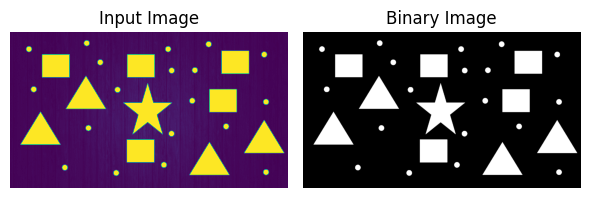

In [18]:
plt.figure(figsize=(6,4))
plt.subplot(121)
plt.title("Input Image")
plt.imshow(Shapes)
plt.axis(False)
plt.subplot(122)
plt.title("Binary Image")
plt.imshow(binaryImage, cmap="gray")
plt.axis(False)
plt.tight_layout()
plt.show()

In [19]:
#Connected Component
Region_Index = np.zeros_like(binaryImage)
M , N = binaryImage.shape

I = np.copy(binaryImage)
k = 1

equivalent_region = dict()

for i in range(M):                 #ignoring boundaries
  for j in range(N):               #ignoring boundaries
     
    if I[i,j] == 1 and I[i-1, j] == 0 and I[i, j-1] == 0:
      Region_Index[i,j] = k
      k = k+1

    if I[i,j] == 1 and I[i-1, j] == 1 and I[i, j-1] == 0:
      Region_Index[i,j] = Region_Index[i-1,j]
    
    if I[i,j] == 1 and I[i-1, j] == 0 and I[i, j-1] == 1:
      Region_Index[i,j] = Region_Index[i,j-1]

    if I[i,j] == 1 and I[i-1, j] == 1 and I[i, j-1] == 1:
      Region_Index[i,j] = Region_Index[i-1,j]

      if Region_Index[i-1, j] in  list(equivalent_region.keys()):
        equivalent_region.update({Region_Index[i, j-1]:equivalent_region[Region_Index[i - 1, j]]})   # Keeping value same for different keys if they are conected
      else:
        equivalent_region.update({Region_Index[i, j - 1]: Region_Index[i - 1, j]})  

In [20]:
key = list(equivalent_region.keys())
for j in range(N):
    for i in range(M):
        if Region_Index[i,j] in key:
            Region_Index[i,j]=equivalent_region[Region_Index[i,j]]

In [21]:
unique_euivalent_region =set(equivalent_region.values())
unique_Region_Index = set(np.unique(Region_Index))
len(unique_euivalent_region), len(unique_Region_Index)

(29, 31)

In [22]:
unique_Region_Index - unique_euivalent_region

{0, 377}

In [23]:
np.where(Region_Index == 377)

(array([473]), array([564]))

In [24]:
l=Region_Index.tolist()

pixelBinvalues=[]
for item in list(unique_euivalent_region):
    pixelBinvalues.append(np.count_nonzero(Region_Index == item))

m=min(pixelBinvalues) #As given image has smallest object is circle
countCircle=0
for item in pixelBinvalues:           
    if item <= m*1.05 and item >= m*0.95:    #taking 5% error account
        countCircle+=1

print(f"Number of Circle:{countCircle}")

Number of Circle:19


******
***O - Background***

***377 - outlier during otsu binarization as it is present at only one location***

***Therefore no. of connected Components : 29***

***Therefore no. of Circles : 19***
******

# MSER

Maximally Stable Extremal Regions (MSER) correspond
to regions of connected components which when thresholded around a certain threshold are stable
in terms of the size of the component. This allows an adaptive thresholding method where different
regions can be thresholded using different thresholds automatically. Determine the binarized image
for DoubleColorShapes.png based on MSER using the following steps:


*    Sweep over all thresholds
*    For each threshold, determine connected components in the image
*    A connected component is termed an MSER if the size of the component does not change much (within δ) for a small perturbation ϵ in the choice of the threshold. Note that both δ and ϵ are parameters that need to be chosen. Determine the stable threshold for each connected component.
*    Ignore extremely large or extremely small connected components in the above analysis.

Compare the performance of Otsu’s binarization with the above method on DoubleColorShapes.png. Think about why Otsu will not be able to extract both the words in this case.


In [26]:
image = skimage.io.imread("/content/images/DoubleColorShapes.png")